In [2]:
#Setting the path of the home directory
import os
HOME = os.getcwd()
print (HOME)

/content


In [3]:
#Installing
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [4]:
#Importing YOLO for models, and display and image for viewing and showing images
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!pip install roboflow --quiet

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00


In [6]:
#setting the path to the dataset
!pwd

/content


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YoG4SVJnZZJMD9xWywUA")
project = rf.workspace("detection-e83li").project("smokeandfire")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smokeandfire-2 in yolov8:: 100%|██████████| 19708/19708 [00:03<00:00, 5924.69it/s]


In [8]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 262MB/s]
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/smokeandfire-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1715273878.d54678c25237.1529.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7740.jpg  weights
P_curve.png					    train_batch7741.jpg
PR_curve.png					    train_batch7742.jpg


/content


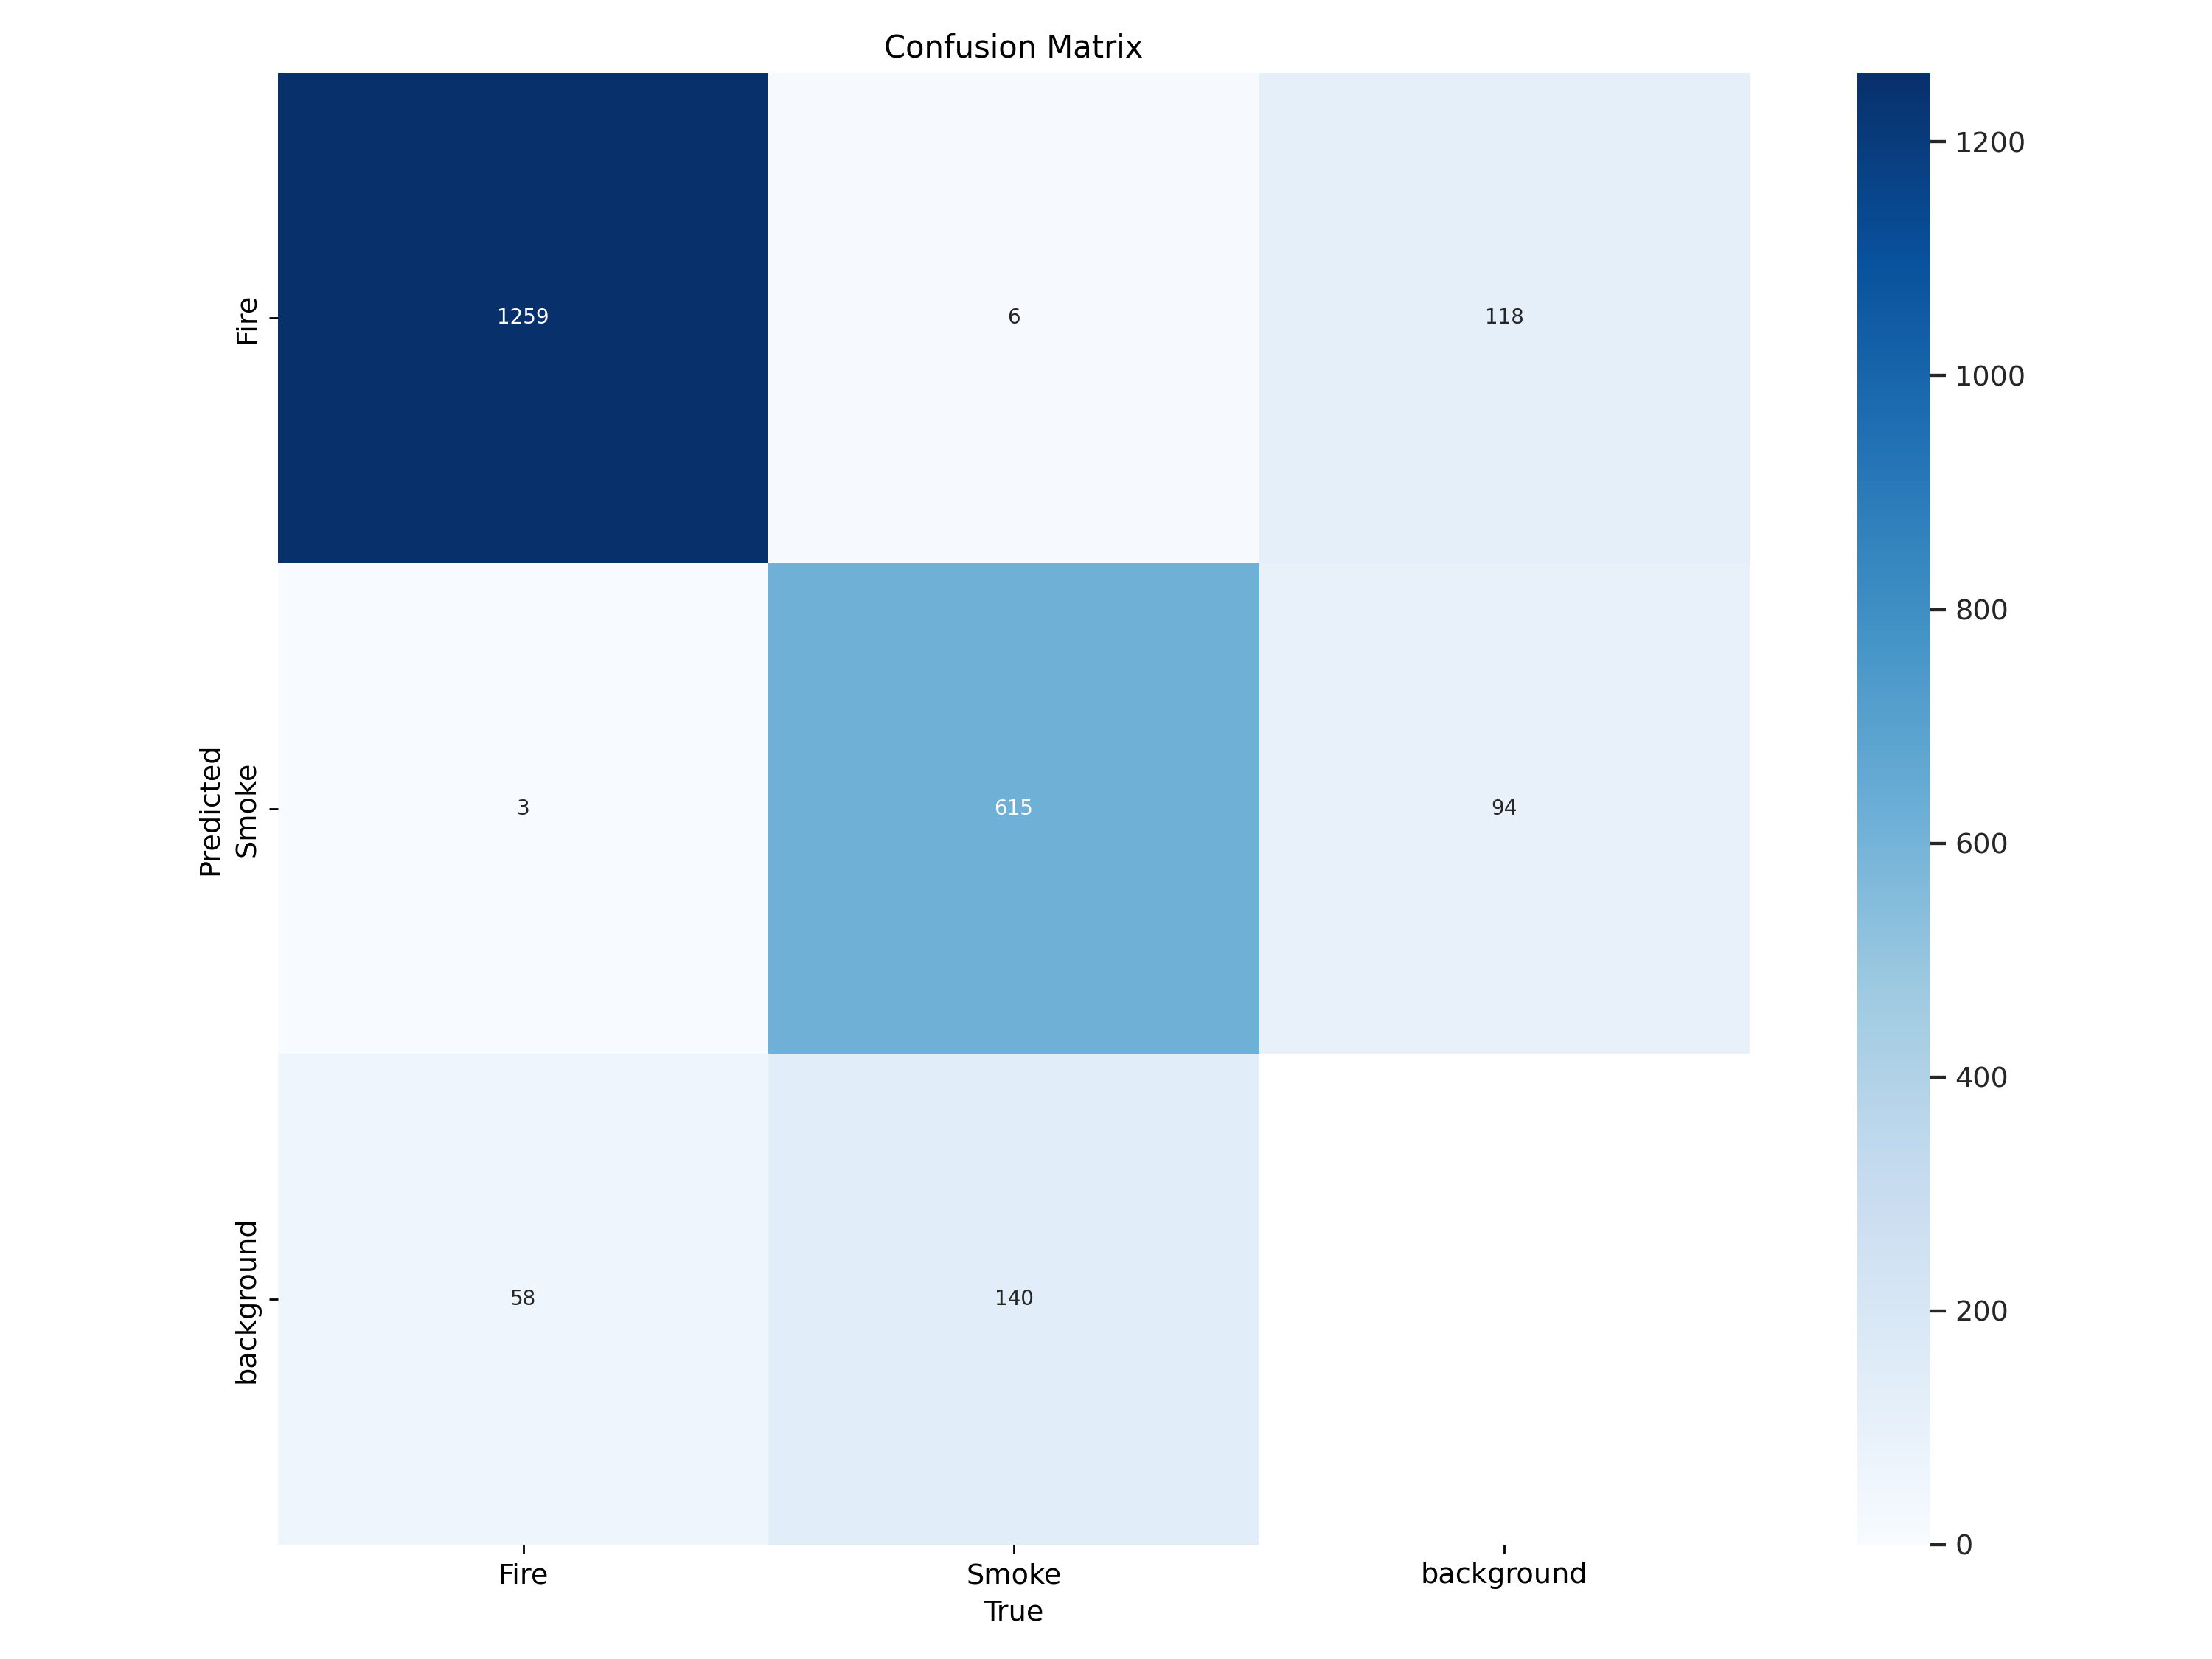

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


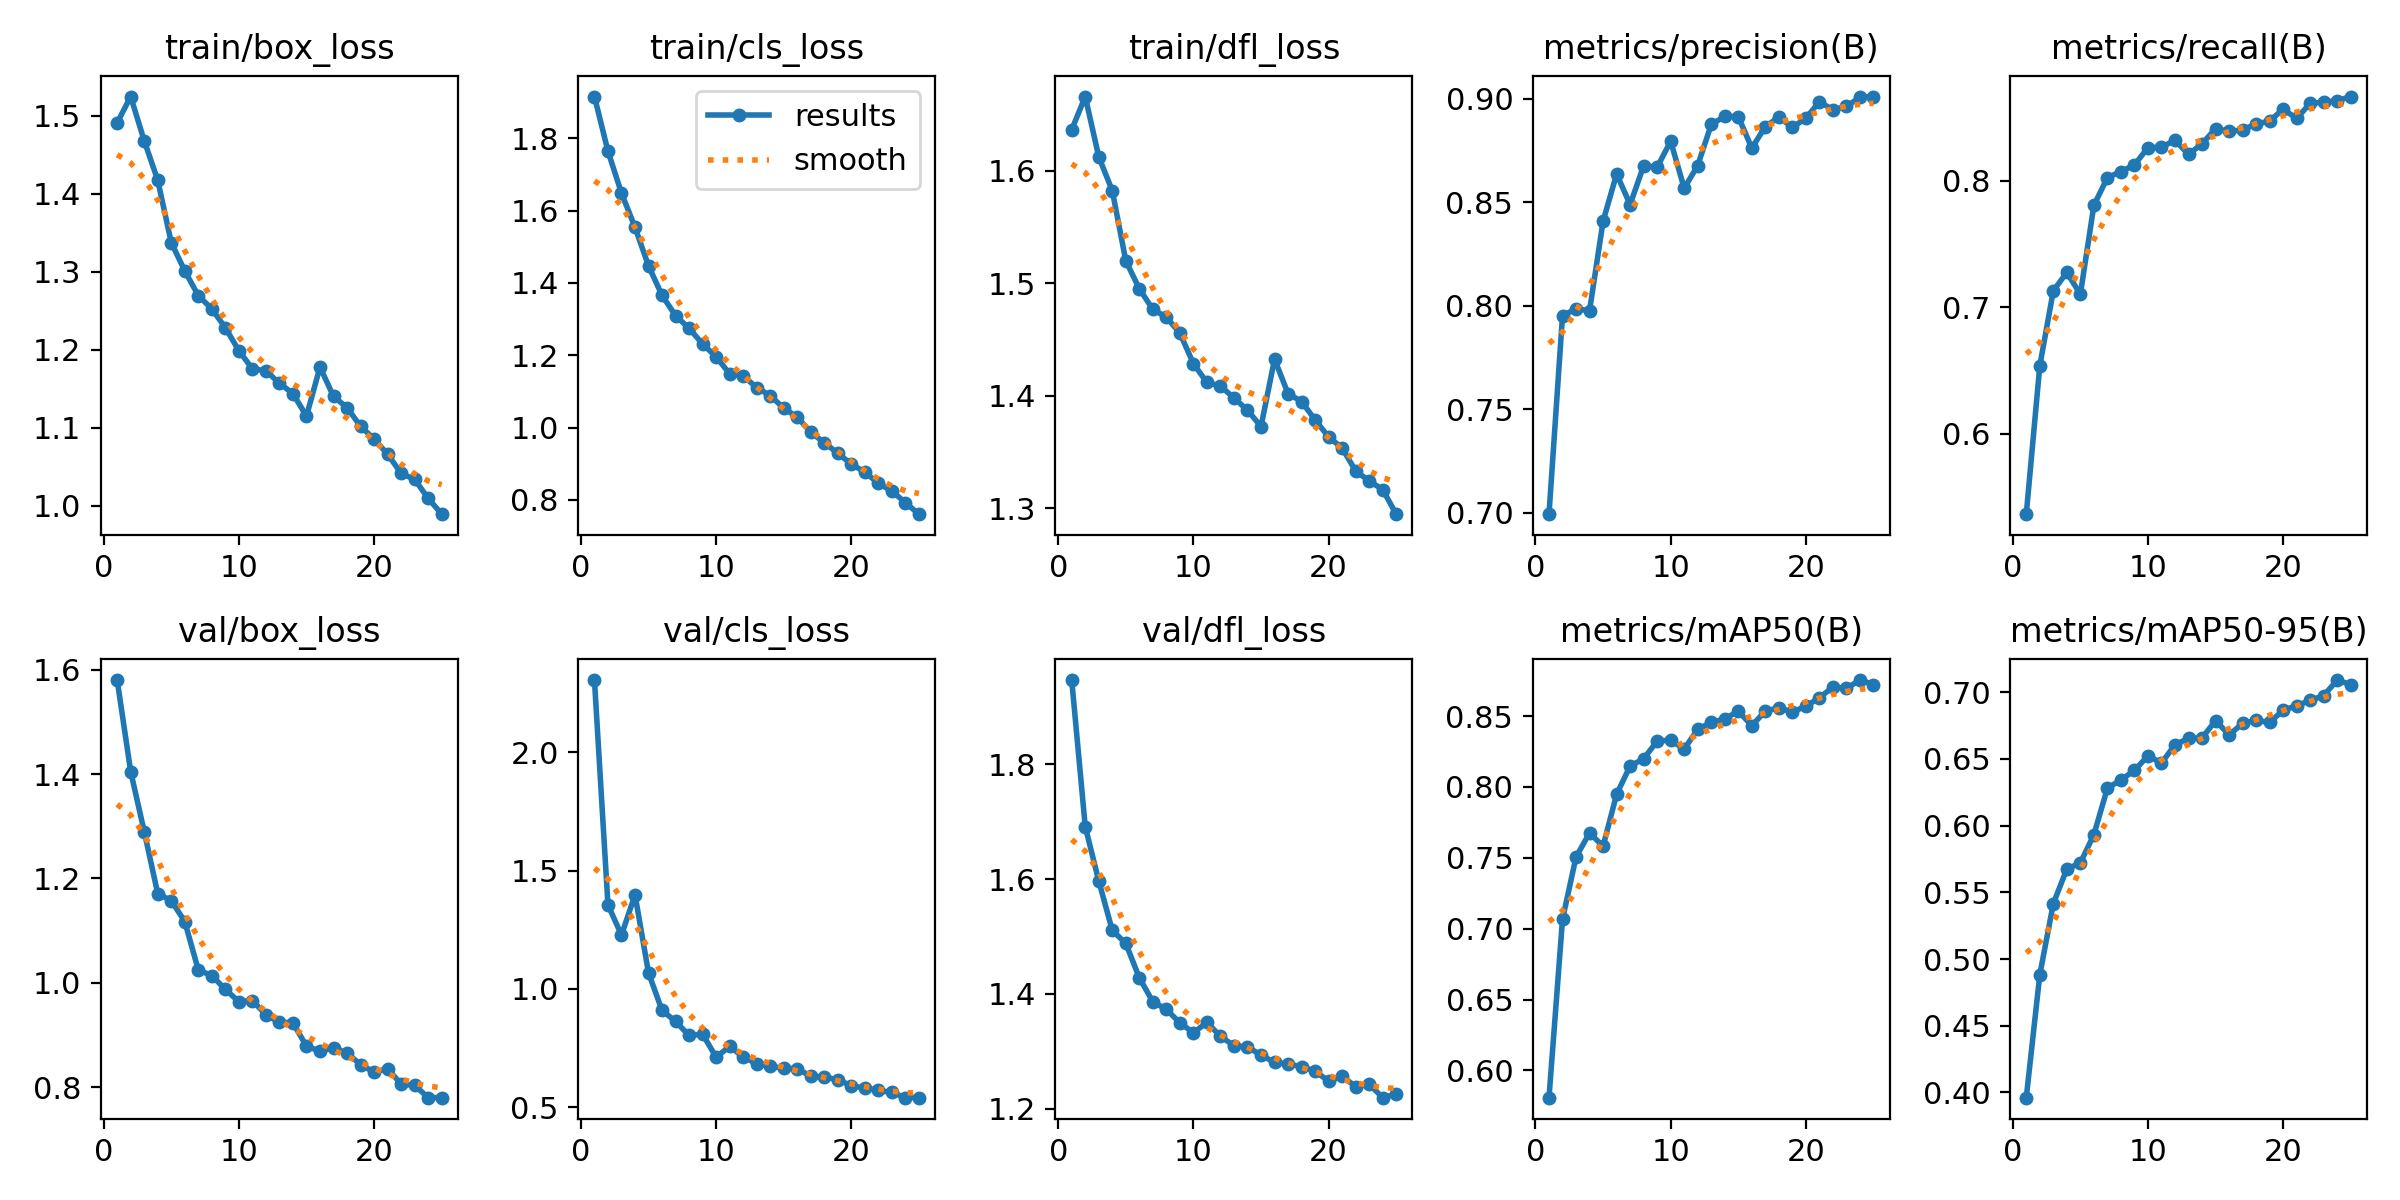

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [12]:
#validating the model
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/smokeandfire-2/valid/labels.cache... 1062 images, 3 backgrounds, 0 corrupt: 100% 1062/1062 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 67/67 [00:25<00:00,  2.59it/s]
                   all       1062       2081      0.901      0.863      0.875       0.71
                  Fire       1062       1320      0.912      0.943      0.929      0.765
                 Smoke       1062        761      0.891      0.783      0.821      0.654
Speed: 0.7ms preprocess, 18.1ms inference, 0.0ms loss, 1.5ms postp

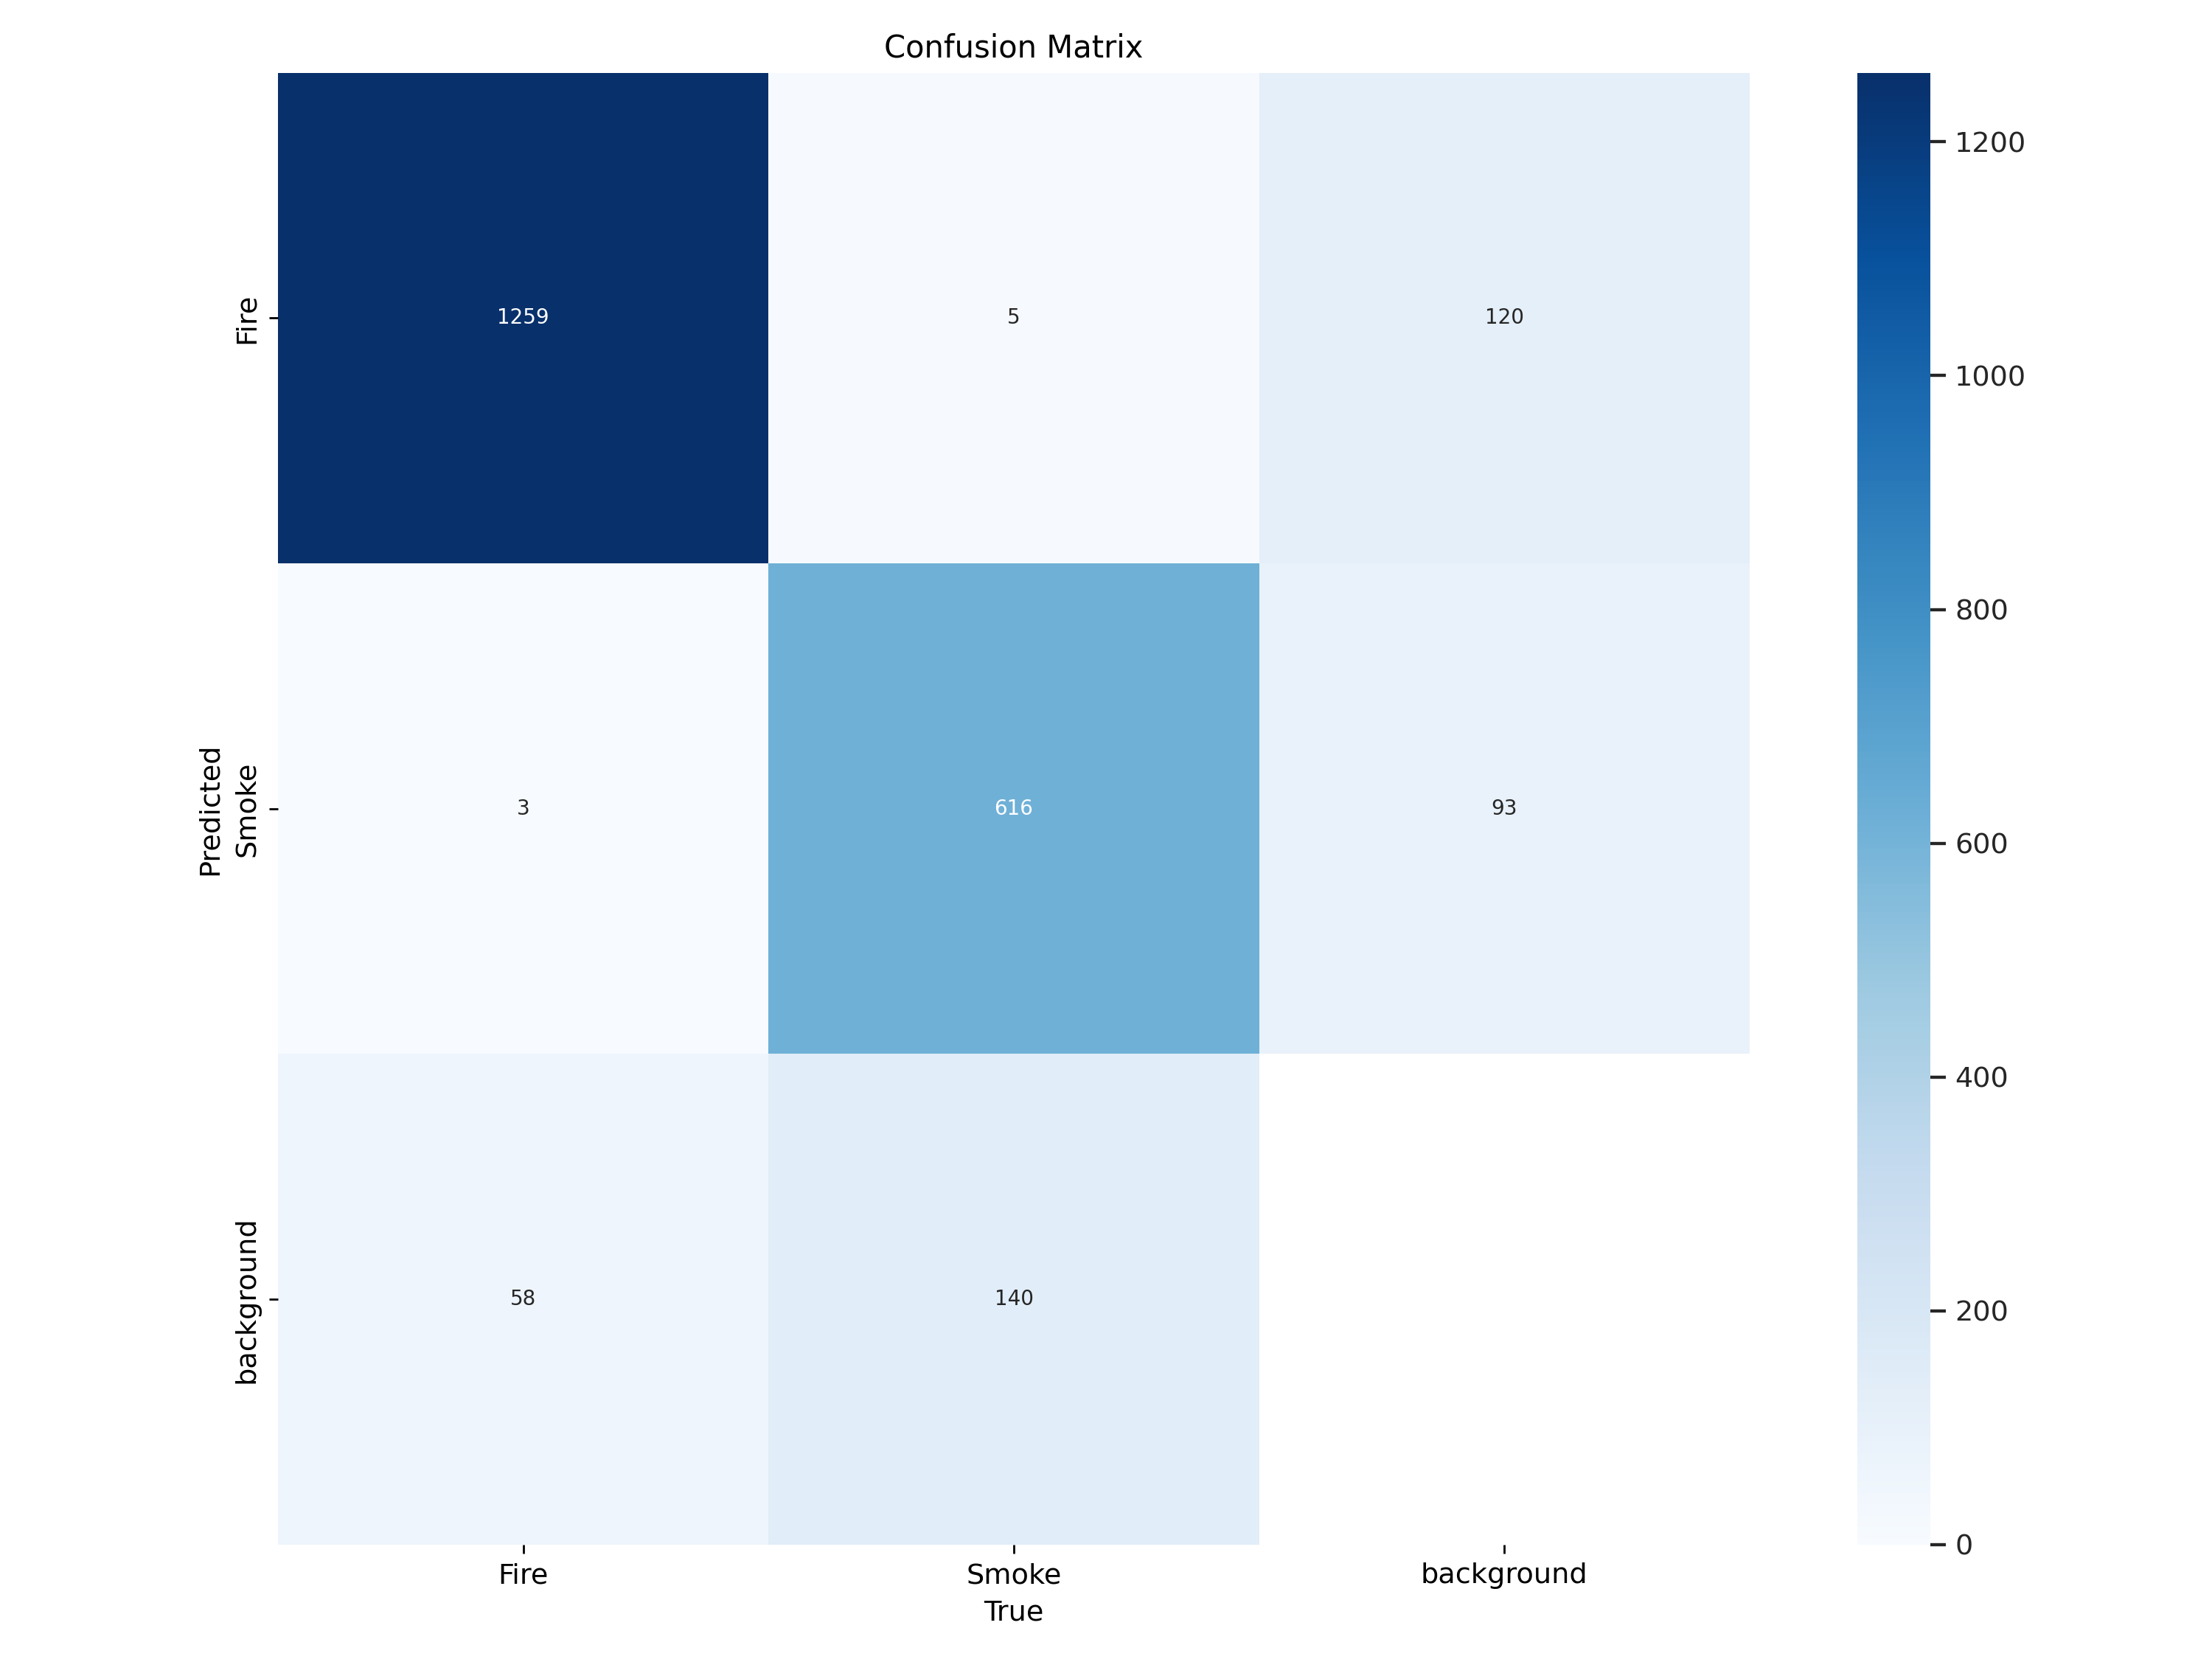

In [13]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png', width=600)

In [14]:
#Inference with custom model
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.65 source=/content/smokeandfire-2/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/543 /content/smokeandfire-2/test/images/0055_jpg.rf.09d79673d86d0fa52a1a93305ed458a4.jpg: 640x640 (no detections), 37.0ms
image 2/543 /content/smokeandfire-2/test/images/WEB09331_jpg.rf.2d941bdffa4e11ff7b2cec8066d4c7b8.jpg: 384x640 (no detections), 78.6ms
image 3/543 /content/smokeandfire-2/test/images/fire_damage_jpg.rf.838bde4b3b1d858518122e70d47e5571.jpg: 640x640 (no detections), 37.7ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 4/543 /content/smokeandfire-2/test/images/fire_jpg.rf.232cadba585833a210940943e54c02f5.jpg: 640x640 1 Fire, 36.9ms
image 5/543 /content/smokeandfire-2/test/images/frame_005_jpg.rf.4b798b1474d24f9a332af2f1f4b8e97b.jpg: 480x640 1 Fire, 75.4ms
image 6/543 /content/smokeandfire-2/test/images/frame_005_jpg.rf.5cf281ebb6c4f964c7387ace32e4502d.jpg: 480x640 1 Fire, 28.0ms
image

In [18]:
import glob
from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpeg')[:3]:
#       display(Image(filename=image_path, height=600))
#       print("\n")
# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpeg')[:3]:
#     display(Image(filename=image_path, height=600))
#     print("\n")
# Get the list of image paths in the folder
image_paths = glob.glob('{HOME}/runs/detect/predict' + '/*.jpeg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, height=600))
    print("\n")


In [20]:
import cv2


VIDEOS_DIR = os.path.join('.', 'videos')

video_path = os.path.join(VIDEOS_DIR, 'longer.mp4')
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

# Define class names
class_names = ['Fire','Smoke']


threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            class_name = class_names[int(class_id)]
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, class_name.upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()


0: 384x640 2 Fires, 26.1ms
Speed: 3.2ms preprocess, 26.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fires, 25.1ms
Speed: 1.2ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fires, 21.7ms
Speed: 1.0ms preprocess, 21.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fires, 21.7ms
Speed: 1.2ms preprocess, 21.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fires, 21.8ms
Speed: 1.2ms preprocess, 21.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Fires, 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Fires, 21.7ms
Speed: 1.2ms preprocess, 21.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Fires, 21.9ms
Speed: 1.9ms preprocess, 21.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
